In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import itertools
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
import json

## Conversion Rate plots
The conversion rate of each class can be modified from the configuration file, changing the matrix of probabilities. <br>
We have decided these as default conversion rates because they best represent the will of different types of users to purchase the product at the various price tags. 

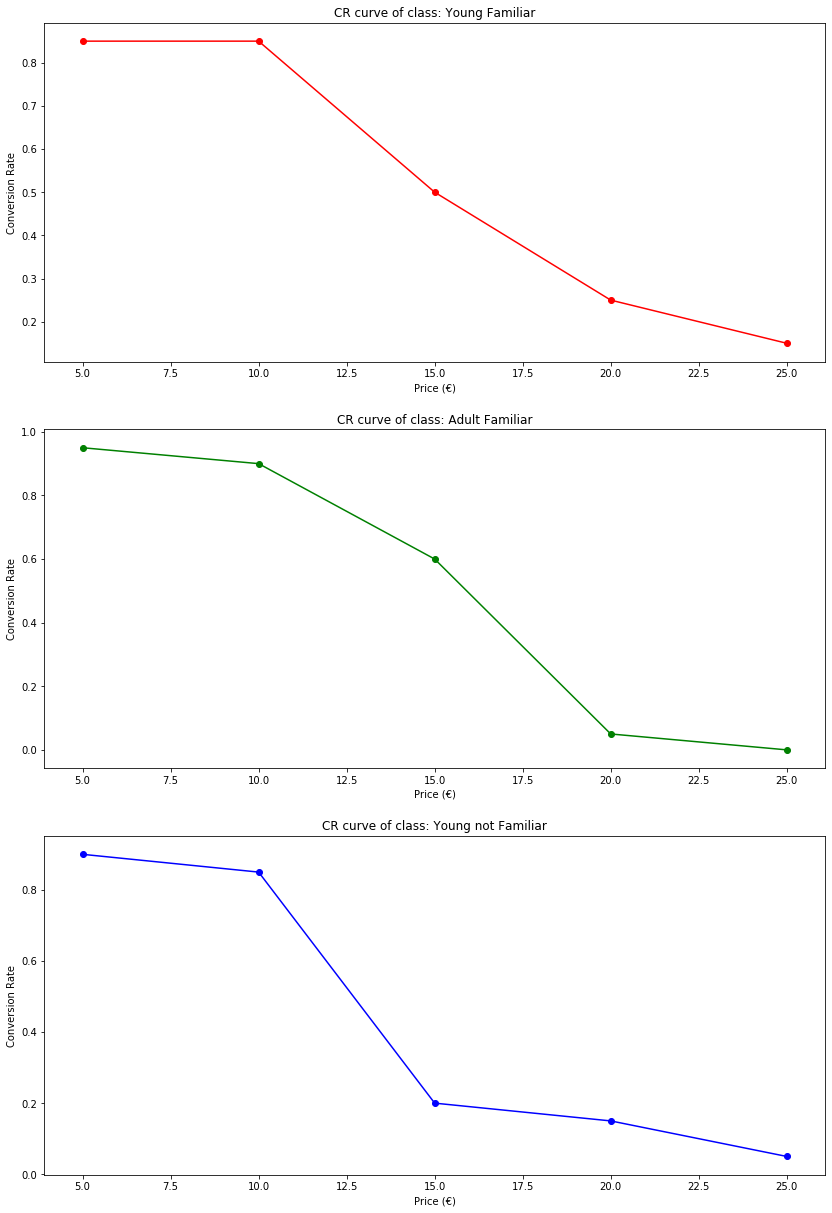

In [26]:
with open('Pricing/configs/pricing_env.json') as json_file:
    data = json.load(json_file)
campaign = data["campaigns"][0]

categories = [campaign["categories"][i] for i in range(len(campaign["categories"]))]
p_categories = np.array(campaign["p_categories"])
arms_candidates = np.array([5,10,15,20,25])  #TODO np.array(campaign["prices"])
aux_dict = {0:"Young Familiar", 1: "Adult Familiar", 2:"Young not Familiar"}

fig, axs = plt.subplots(3, figsize=(14,8))
plt.subplots_adjust(bottom=0.5, top = 2.5)

x = arms_candidates
colors = ['r', 'g', 'b']
for i in range(len(categories)):
    y = p_categories[i]
    smooth= interp1d(x, y, kind='cubic')
    axs[i].plot(x, smooth(x), color=colors[i])
    axs[i].scatter(x, y, color=colors[i])
    axs[i].set_title("CR curve of class: " + aux_dict[i])
    axs[i].set_xlabel("Price (€)")
    axs[i].set_ylabel("Conversion Rate")

plt.show()



## Click Functions plots
These functions return the number of clicks as the budget spent on the advertising campaign changes. As we have seen during lecture they are monotonically increasing until they reach a certain value.<br>
The function representing them is: $$m(1-e^{sx})$$
where \\(m\\) is the maximum value that the number of clicks can reach and \\(s\\) modify the slope of the curve, with \\(0 \lt s\lt1\\).

In [68]:
from Advertising.environment.CampaignEnvironment import *
env = Environment(0)

phase_labels = env.phase_labels
phase_weights = env.get_phase_weights()
feature_labels = env.feature_labels
click_functions = env.click_functions
sigma = env.sigma
budgets = np.linspace(0, 10, num=11)
x = np.linspace(0,max(budgets), num=550)

camp = Campaign(x, phases=phase_labels, weights=phase_weights)
for feature_label in feature_labels:
    camp.add_subcampaign(label=feature_label, functions=click_functions[feature_label])

### Single phase
TODO: Show how we aggregate different phases

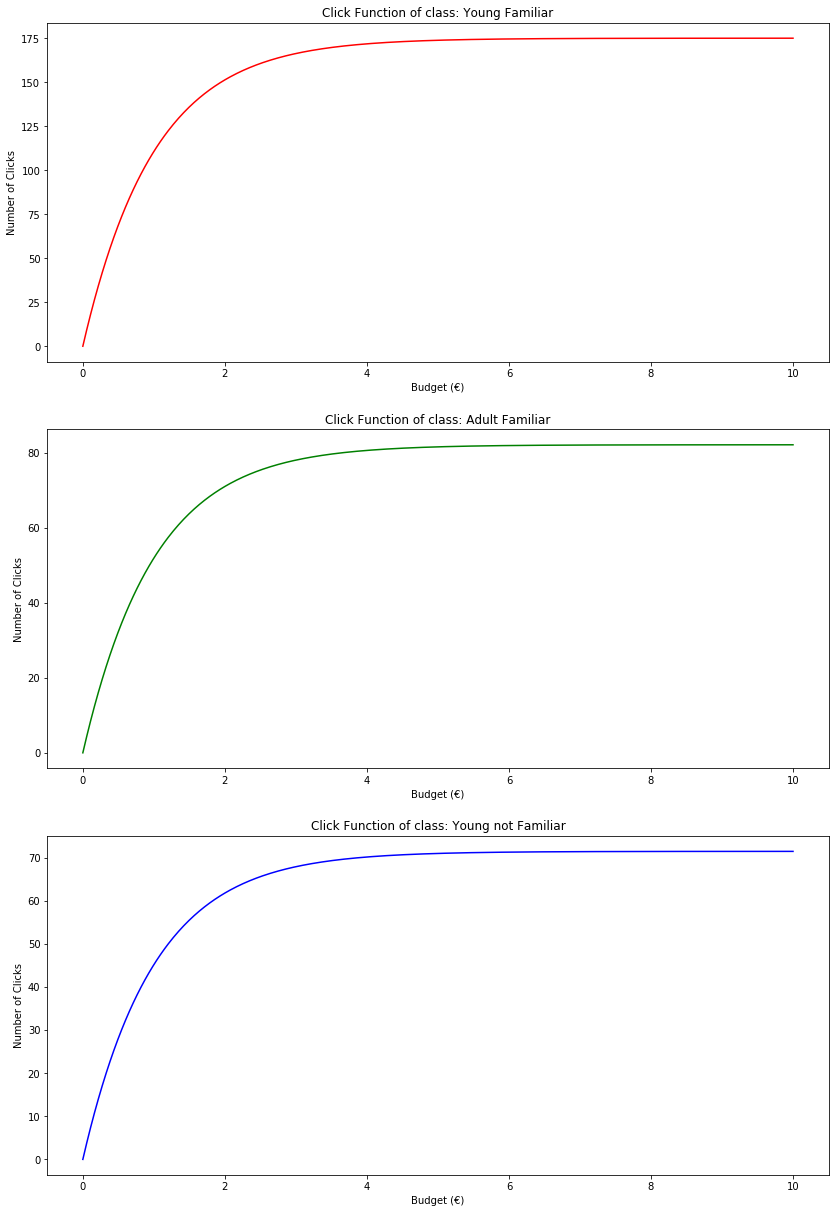

In [73]:
click_functions = camp.round_all()
colors = ['r', 'g', 'b']
fig, axs = plt.subplots(3, figsize=(14,8))
plt.subplots_adjust(bottom=0.5, top = 2.5)
for i in range(len(feature_labels)):
    y = click_functions[i]
    axs[i].plot(x, y, color=colors[i])
    axs[i].set_title("Click Function of class: " + aux_dict[i])
    axs[i].set_xlabel("Budget (€)")
    axs[i].set_ylabel("Number of Clicks")

### Three Abrupt phases

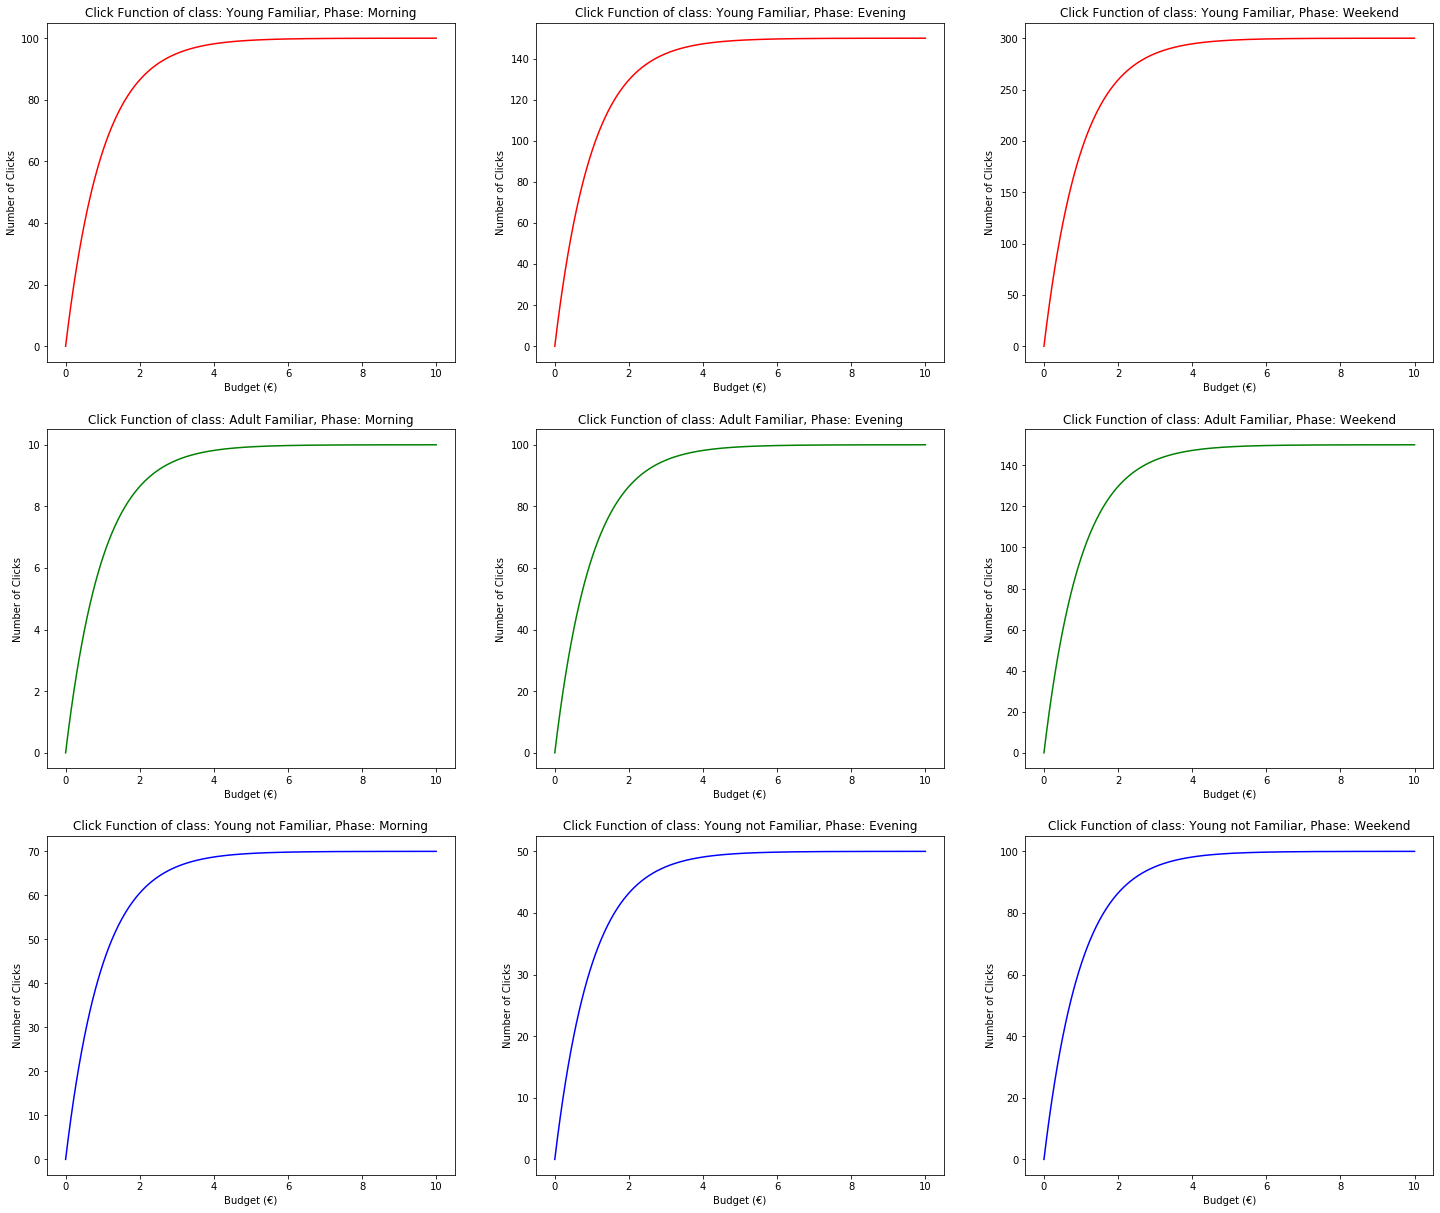

In [80]:
fig, axs = plt.subplots(3,3, figsize=(14,8))
plt.subplots_adjust(bottom=0.5, top = 2.5, right=1.5)
for i in range(len(feature_labels)):
    for j, phase in enumerate(phase_labels):
        click_functions = camp.round_all(phase=j)
        y = click_functions[i]
        axs[i,j].plot(x, y, color=colors[i])
        axs[i,j].set_title("Click Function of class: " + aux_dict[i] + ", Phase: "+phase )
        axs[i,j].set_xlabel("Budget (€)")
        axs[i,j].set_ylabel("Number of Clicks")